# Import Stuff

In [3]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline
%matplotlib notebook

In [4]:
data = pd.read_csv("merged_data.csv")

In [5]:
btc_trace = go.Scatter(x=data['Time'], y=data['Price'], name= 'Price')
py.iplot([btc_trace])

In [6]:
sent_trace = go.Scatter(x=data['Time'], y=data['Sentiment'], name= 'Sentiment')
py.iplot([sent_trace])

In [7]:
datag = data[['Price','Sentiment']].groupby(data['Time']).mean()

## Training a simple random model:

In [8]:
from sklearn.preprocessing import MinMaxScaler
values = datag['Price'].values.reshape(-1,1)
sentiment = datag['Sentiment'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [9]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

260 112


In [10]:
def create_dataset(dataset, look_back, sentiment, sent=False):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)

### with lookback = 1 (kind of unigram)

In [11]:
look_back = 1
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [12]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

<IPython.core.display.Javascript object>


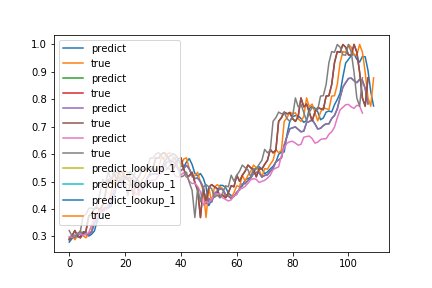

In [16]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [17]:
yhat_inverse_1 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_1 = scaler.inverse_transform(testY.reshape(-1, 1))

In [18]:
rmse_1 = sqrt(mean_squared_error(testY_inverse_1, yhat_inverse_1))
print('Test RMSE: %.3f' % rmse_1)

Test RMSE: 252.339


In [19]:
model_1 = model

### with lookback = 2(kind of biram)

In [20]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [21]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [22]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

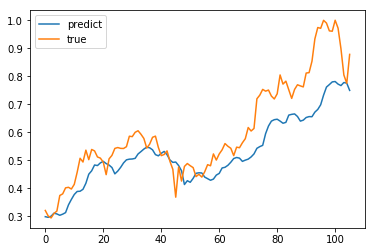

In [37]:
%matplotlib inline
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [38]:
yhat_inverse_2 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_2 = scaler.inverse_transform(testY.reshape(-1, 1))

In [39]:
rmse_2 = sqrt(mean_squared_error(testY_inverse_2, yhat_inverse_2))
print('Test RMSE: %.3f' % rmse_2)

Test RMSE: 708.037


In [40]:
model2 = model

## With lookback = 3

In [41]:
look_back = 3
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [42]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [43]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

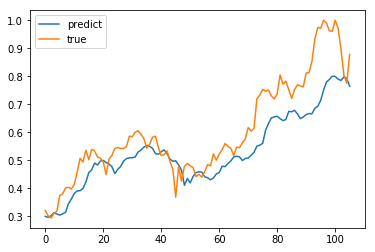

In [46]:
%matplotlib inline
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [47]:
yhat_inverse_3 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_3 = scaler.inverse_transform(testY.reshape(-1, 1))

In [48]:
rmse_3 = sqrt(mean_squared_error(testY_inverse_3, yhat_inverse_3))
print('Test RMSE: %.3f' % rmse_3)

Test RMSE: 663.239


In [49]:
model3 = model

## Plotting different lookups

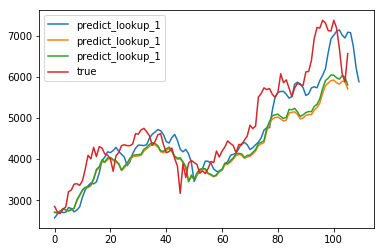

In [50]:
%matplotlib inline
pyplot.plot(yhat_inverse_1, label='predict_lookup_1')
pyplot.plot(yhat_inverse_2, label='predict_lookup_1')
pyplot.plot(yhat_inverse_3, label='predict_lookup_1')
pyplot.plot(testY_inverse_3, label='true')
pyplot.legend()
pyplot.show()

In [51]:
len(datag.index.values)

372

In [60]:
btc_1_trace = go.Scatter(x=datag.index.values[372-110-1:], y=yhat_inverse_1.reshape(110), name= 'predict_lookup_1')
btc_2_trace = go.Scatter(x=datag.index.values[372-106-1:], y=yhat_inverse_2.reshape(106), name= 'predict_lookup_2')
btc_3_trace = go.Scatter(x=datag.index.values[372-106-1:], y=yhat_inverse_3.reshape(106), name= 'predict_lookup_3')
btc_t_trace = go.Scatter(x=datag.index.values[372-110-1:], y=testY_inverse_1.reshape(110), name= 'True')

py.iplot([btc_1_trace,btc_2_trace, btc_3_trace, btc_t_trace])

# With sentiment and lookup2

In [61]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size],sent=True)
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)], sent=True)

In [62]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [63]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

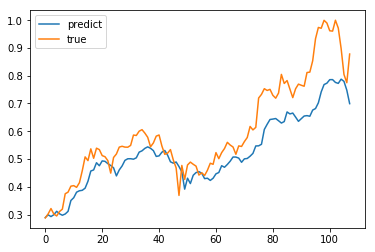

In [64]:
%matplotlib inline
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [65]:
yhat_inverse_sent = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_sent = scaler.inverse_transform(testY.reshape(-1, 1))

In [66]:
rmse_sent = sqrt(mean_squared_error(testY_inverse_sent, yhat_inverse_sent))
print('Test RMSE: %.3f' % rmse_sent)

Test RMSE: 658.813


In [67]:
len(yhat)

108

In [72]:
btc_1_trace = go.Scatter(x=datag.index.values[372-108-1:][0:500], y=yhat_inverse_sent.reshape(108)[0:500], name= 'With_Sentiment')
btc_2_trace = go.Scatter(x=datag.index.values[372-110-1:][0:500], y=yhat_inverse_1.reshape(110)[0:500], name= 'No_Sentiment')
btc_3_trace = go.Scatter(x=datag.index.values[372-108-1:][0:500], y=testY_inverse_sent.reshape(108)[0:500], name= 'True')
py.iplot([btc_1_trace,btc_2_trace,btc_3_trace])

In [73]:
model_sent = model

## Now go live with the model:

In [74]:
import MySQLdb
#Enter the values for you database connection
dsn_database = "bitcoin"         # e.g. "MySQLdbtest"
dsn_hostname = "173.194.231.244"      # e.g.: "mydbinstance.xyz.us-east-1.rds.amazonaws.com"
dsn_port = 3306                  # e.g. 3306 
dsn_uid = "demo"             # e.g. "user1"
dsn_pwd = "qwerty@123"              # e.g. "Password123"

ModuleNotFoundError: No module named 'MySQLdb'

In [ ]:
conn = MySQLdb.connect(host=dsn_hostname, port=dsn_port, user=dsn_uid, passwd=dsn_pwd, db=dsn_database)

In [ ]:
cursor=conn.cursor()
cursor.execute("""SELECT * FROM live_data""")
cursor.fetchone()

In [ ]:
print ("\nShow me the records:\n")
rows = cursor.fetchall()
import pprint
pprint.pprint(rows)

In [ ]:
cursor.execute("""INSERT INTO live_data values(15625,16000,0.8,'1000-01-01 00:00:00');""")

In [ ]:
conn.commit()

In [ ]:
cursor.close()

In [ ]:
# develop a real time pipeline

In [ ]:
import queue 
import time
import matplotlib

In [ ]:
matplotlib.__version__

In [ ]:
import queue
import matplotlib.pyplot as plt
true_q = queue.Queue()
pred_q = queue.Queue()
'''
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
fig.canvas.draw()
plt.ion()
'''

def process_data(in_data):
    out_data = []
    for line in in_data:
        out_data.append(float(line.split(',')[0]))
    return np.array(out_data).reshape(-1,1)
prev = 15000
threshold = 0.5
while True:
    btc = open('live_bitcoin.csv','r')
    sent = open('live_tweet.csv','r')
    bit_data = btc.readlines()
    sent_data = sent.readlines()
    bit_data = process_data(bit_data[len(bit_data)-5:])
    sent_data = process_data(sent_data[len(sent_data)-5:])
    live = scaler.transform(bit_data)
    testX, testY = create_dataset(live, 2, sent_data, sent=True)
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    yhat = model.predict(testX)
    yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
    true_q.put(bit_data[4])
    pred_q.put(yhat_inverse[0])
    val = 100*((yhat_inverse[0][0] - prev)/prev)
    if val > threshold:
        decision = 'buy'
    elif val <-threshold:
        decision = 'sell'
    else:
        decision = ''
    prev = yhat_inverse[0][0]
    input_string = "INSERT INTO live_data values ({},{},{},'{}','{}');".format(yhat_inverse[0][0],bit_data[0][0],sent_data[4][0],datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S '),decision)
    cursor.execute(input_string)
    conn.commit()
    time.sleep(60)
    '''
    if true_q.qsize() > 9:
        true_q.get()
        pred_q.get()
        ax.clear()
        ax.plot()
        ax.plot(list(true_q.queue),'-',label='True')
        ax.plot(list(pred_q.queue),'--',label='Predict')
        ax.legend()
        fig.canvas.draw()
        time.sleep(60)
    ''' 
        

In [ ]:
import datetime
datetime.datetime.now()